In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import display

In [2]:
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO, force=True
)

In [3]:
from gensim.models import KeyedVectors
import gensim.downloader as api
model_name = 'word2vec-google-news-300'
wv = api.load(model_name)

2023-08-16 17:08:55,763 - INFO - loading projection weights from /home/bardanik-rem/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2023-08-16 17:09:24,458 - INFO - KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /home/bardanik-rem/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-08-16T17:09:24.458582', 'gensim': '4.3.1', 'python': '3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:17) [GCC 12.2.0]', 'platform': 'Linux-6.1.0-10-amd64-x86_64-with-glibc2.36', 'event': 'load_word2vec_format'}


In [4]:
import utils
import evaluators


ev = evaluators.GensimEvaluator(model=wv, model_name=model_name, similarity_method=utils.SimilarityFunction.cosine)
ev.load_dataset("../datasets/dataset_1.json")

In [5]:
ev.reset_evaluator()
evaluation = ev.evaluate()

'OOV:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
14,1,animal,"(afrotropical, 0)",0,NaN,False,True
26,1,animal,"(favourable, 0)",0,NaN,False,True
34,1,animal,"('s, 0)",0,NaN,False,True
66,1,fauna,"(afrotropical, 0)",0,NaN,False,True
78,1,fauna,"(favourable, 0)",0,NaN,False,True
...,...,...,...,...,...,...,...
1554,4,resource,"(benkendorff, 0)",0,NaN,False,True
1563,4,resource,"(anti-cancer, 0)",0,NaN,False,True
1565,4,resource,"(``, 0)",0,NaN,False,True
1577,4,resource,"('s, 1)",0,NaN,False,True


'Lost:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
1513,4,when,"(now, 0)",1,NaN,True,False
1514,4,when,"(now, 1)",1,NaN,True,False


'Statistics:'

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
word2vec-google-news-300-cos,0.363297,0.74359,0.682353,0.711656,0.970366,0.699729


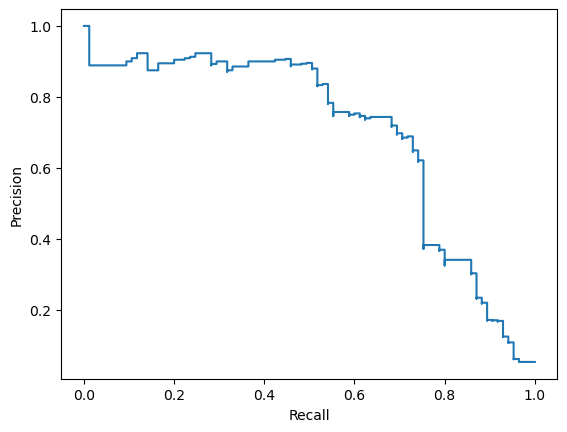

In [34]:
st = utils.Statistics(ev)

display("OOV:")
display(st.get_oov())

display("Lost:")
display(st.get_lost())

stats = st.calculate_statistics()
display("Statistics:")
display(stats)

st.display_PRC()

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
word2vec-google-news-300-cos,0.363297,0.743590,0.682353,0.711656,0.970366,0.699729
word2vec-google-news-300-dot,3.239772,0.705128,0.647059,0.674847,0.966583,0.629354
word2vec-google-news-300-euc,2.813386,0.313725,0.376471,0.342246,0.922446,0.295685


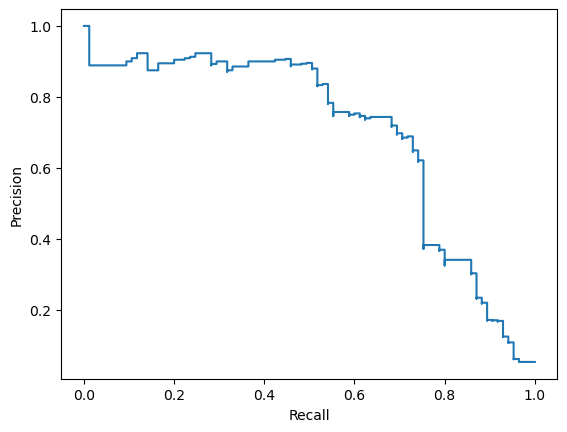

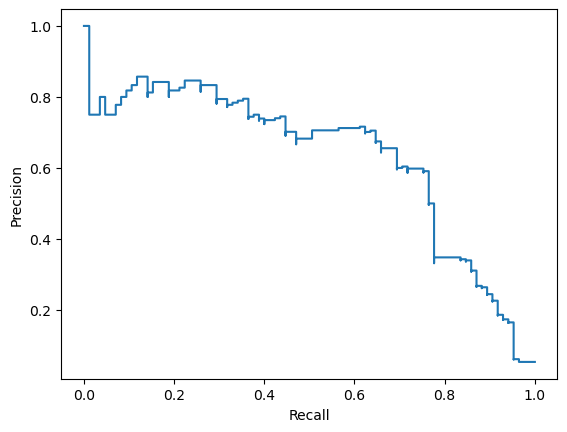

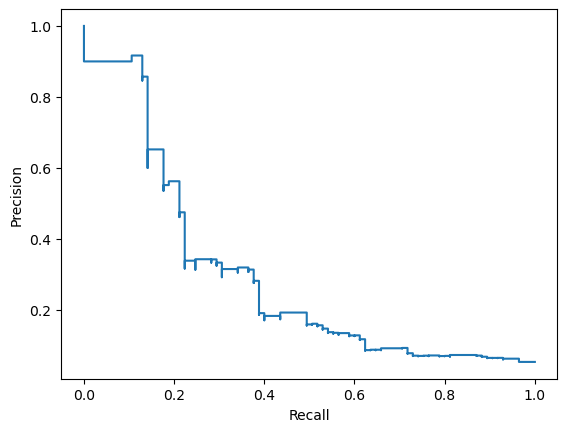

In [6]:
import pandas as pd
methods = [member for member in utils.SimilarityFunction]

results = pd.DataFrame()

for method in methods:
    ev.similarity_method = method
    ev.reset_evaluator()
    data = ev.evaluate()
    st = utils.Statistics(ev)
    stats = st.calculate_statistics()
    st.display_PRC()
    results = pd.concat([results, stats])

display(results)